<a href="https://colab.research.google.com/github/molinacle/desafio_latam/blob/main/Desaf%C3%ADo_Latam_Desaf%C3%ADo_3_Estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFÍO LATAM - DESAFÍO 3**
---

*   ALUMNO: SEBASTIÁN MOLINA
*   MODULO: ESTADÍSTICA DESCRIPTIVA Y PROBABILIDAD
*   CARRERA: DATA SCIENCE

###Experimento:###
Un grupo de investigadores está interesado en analizar la relación entre el hábito de fumar con el crecimiento de los bebés en edad gestacional. Para esto han recopilado los datos guardados en el dataset baby.csv, que contiene los siguientes campos de datos:
- Birth.Weight : Peso del bebe
- Gestational.Days: Días de gestación
- Maternal.Age: Edad de la madre
- Maternal.Height: Altura de la madre
- Maternal.Pregnancy.Weight: Peso de la madre
- Maternal.Smoker: ¿Es la madre fumadora? (True: fumadora, False: no es fumadora)

In [17]:
# Importación de librerías y datos.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [18]:
# Cargar el dataset

data = pd.read_csv("baby.csv")
data.head()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


In [19]:
# Pregunta 1: Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes.

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB
None
        Unnamed: 0  Birth.Weight  Gestational.Days  Maternal.Age  \
count  1174.000000   1174.000000       1174.000000   1174.000000   
mean    587.500000    119.462521        279.101363     27.228279   
std     339.048915     18.328671         16.010305      5.817839   
min       1.000000     55.000000        148.000000     15.000000   
25%     294.250

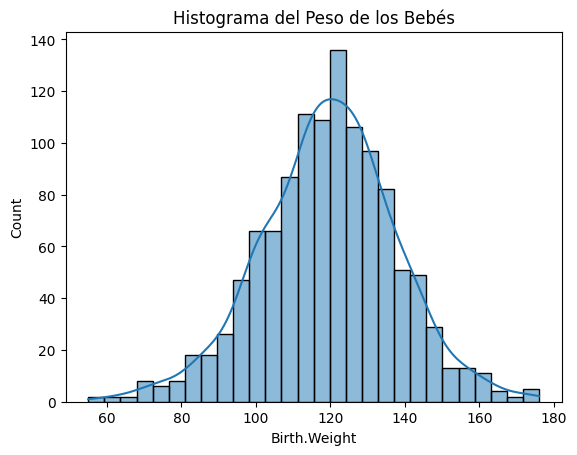

In [20]:
# Pregunta 2: Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución normal?
# Justifica tu respuesta creando los gráficos y modelos necesarios.

sns.histplot(data['Birth.Weight'], kde=True)
plt.title('Histograma del Peso de los Bebés')
plt.show()

In [21]:
# Prueba de normalidad con el test de Shapiro-Wilk

stat, p_value = stats.shapiro(data['Birth.Weight'])
print(f'Statistic: {stat}, p-value: {p_value}')
if p_value > 0.05:
    print("No se puede rechazar la hipótesis nula: los datos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución normal.")

Statistic: 0.9956281185150146, p-value: 0.00191177474334836
Se rechaza la hipótesis nula: los datos no siguen una distribución normal.


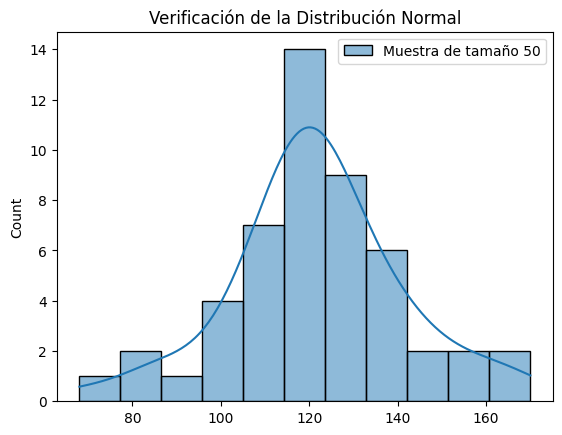

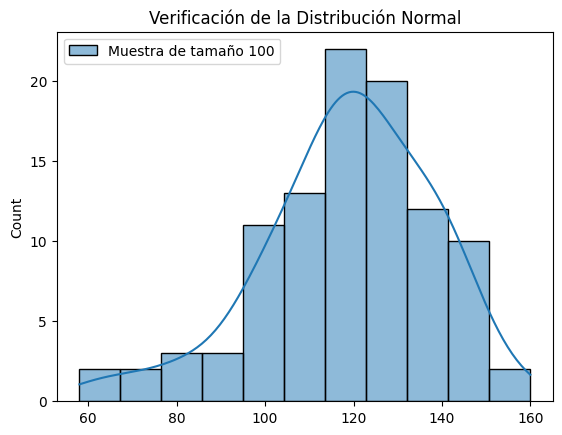

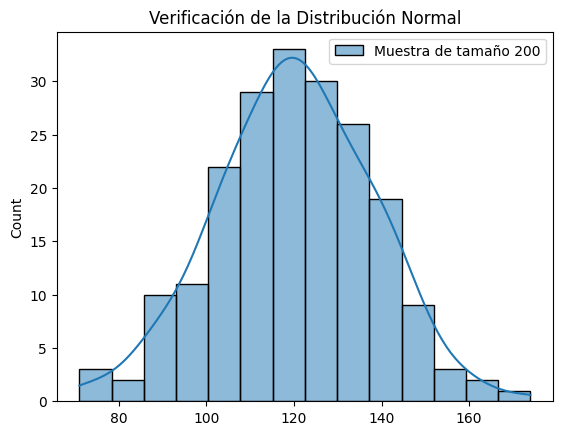

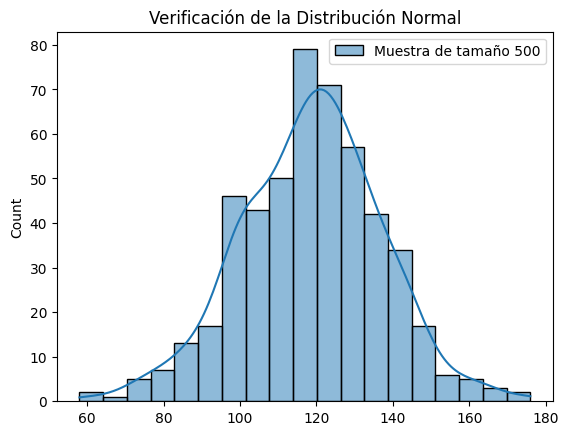

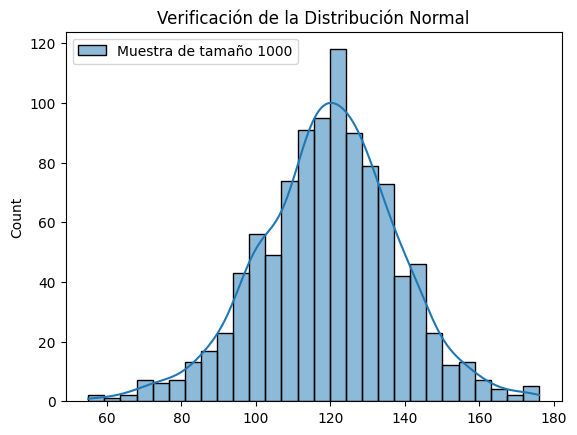

In [22]:
# Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5 valores diferentes.
# Compara con los datos reales.

np.random.seed(42)
sample_sizes = [50, 100, 200, 500, 1000]

for size in sample_sizes:
    sample_data = np.random.choice(data['Birth.Weight'], size=size, replace=False)
    sns.histplot(sample_data, kde=True, label=f'Muestra de tamaño {size}')
    plt.title('Verificación de la Distribución Normal')
    plt.legend()
    plt.show()

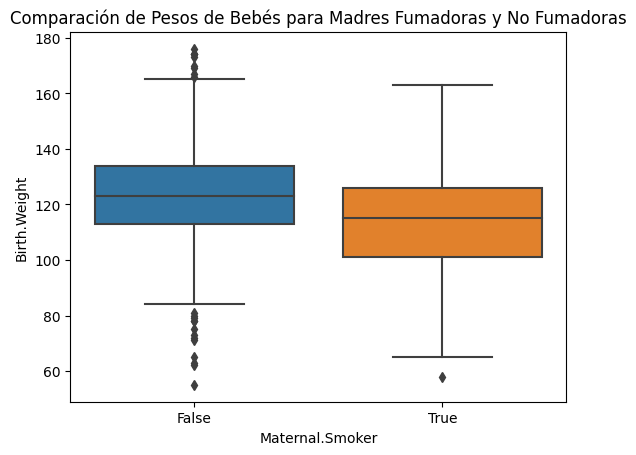

In [23]:
# Compara los pesos de los bebés de madres fumadoras y no fumadoras.
# ¿Qué diferencias existen? Explica y construye los modelos correspondientes.

sns.boxplot(x='Maternal.Smoker', y='Birth.Weight', data=data)
plt.title('Comparación de Pesos de Bebés para Madres Fumadoras y No Fumadoras')
plt.show()

In [24]:
# Prueba t para comparar los pesos

smoker_weights = data[data['Maternal.Smoker'] == True]['Birth.Weight']
non_smoker_weights = data[data['Maternal.Smoker'] == False]['Birth.Weight']

t_stat, p_value_t = stats.ttest_ind(smoker_weights, non_smoker_weights)
print(f'T-statistic: {t_stat}, p-value: {p_value_t}')

T-statistic: -8.718755502379533, p-value: 9.461067881089321e-18


In [25]:
# Pregunta 5: Considerando los datos dados:
# ● Calcula la probabilidad de que una madre escogida al azar fume.

prob_fumar = data['Maternal.Smoker'].mean()
print(f'Probabilidad de que una madre fume: {prob_fumar}')

Probabilidad de que una madre fume: 0.3909710391822828


In [26]:
# ● A partir del valor anterior, construye un modelo de distribución binomial que modele el experimento correspondiente a escoger 5 madres al azar y observar cuántas fuman.

n = 5
binomial_model = np.random.binomial(n, prob_fumar, size=1000)

In [27]:
# ● Utilizando este modelo, simula 1000 muestras de tamaño 8, y calcula sus medias muestrales.

sample_means_model = [np.mean(np.random.choice(binomial_model, size=8, replace=True)) for _ in range(1000)]

In [28]:
# ● Utilizando los datos directamente, extrae 1000 muestras de tamaño 8 y calcula sus respectivas medias muestrales.

sample_means_data = [np.mean(np.random.choice(data['Maternal.Smoker'], size=8, replace=True)) for _ in range(1000)]

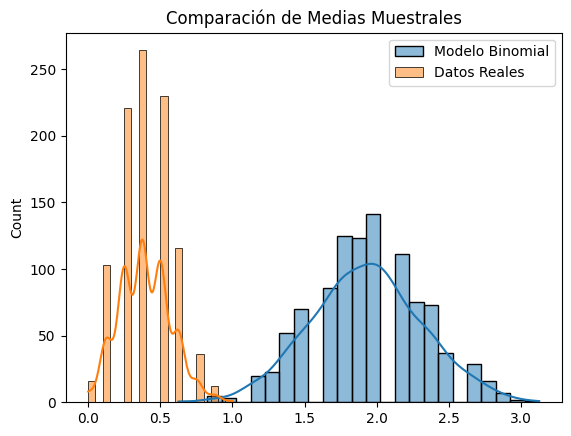

In [29]:
# Utilizando lo anterior:
# ● compara gráficamente los resultados obtenidos anteriormente.

sns.histplot(sample_means_model, kde=True, label='Modelo Binomial')
sns.histplot(sample_means_data, kde=True, label='Datos Reales')
plt.title('Comparación de Medias Muestrales')
plt.legend()
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


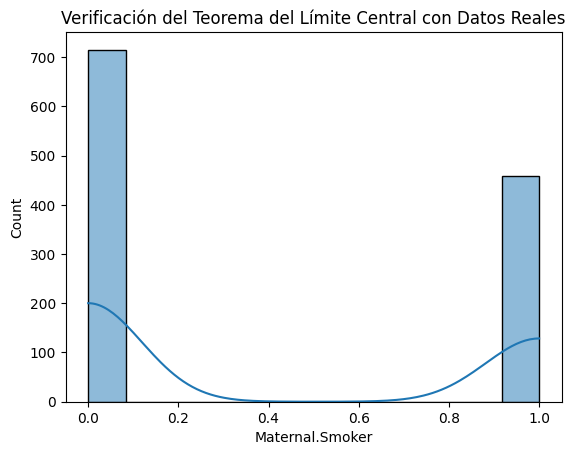

In [30]:
# ● verifica el teorema del límite central, considerando las muestras de datos reales y las simuladas con el modelo binomial.

sns.histplot(data['Maternal.Smoker'], kde=True, label='Datos Reales')
plt.title('Verificación del Teorema del Límite Central con Datos Reales')
plt.show()

In [31]:
# ● construye un modelo de distribución normal derivado del modelo binomial, y grafícalo junto a los anteriores para comparar.

normal_model = np.random.normal(prob_fumar, np.sqrt(prob_fumar * (1 - prob_fumar) / 8), size=1000)

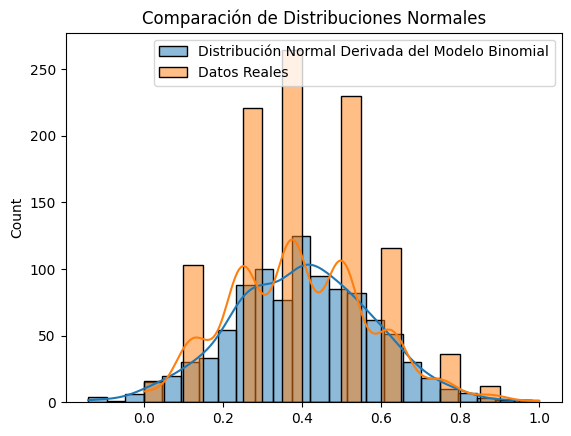

In [32]:
# Gráfica comparativa

sns.histplot(normal_model, kde=True, label='Distribución Normal Derivada del Modelo Binomial')
sns.histplot(sample_means_data, kde=True, label='Datos Reales')
plt.title('Comparación de Distribuciones Normales')
plt.legend()
plt.show()

*Conclusión*


---

En conclusión, el análisis visual y estadístico sugiere que la distribución normal derivada del modelo binomial no se ajusta adecuadamente a las medias muestrales de los datos reales. Además existen algunas diferencias importantes y afectan significativamente la validez de asumir normalidad para el análisis de la relación entre el hábito de fumar de las madres y el peso de los bebés en edad gestacional. En general, la distribución normal derivada del modelo binomial no proporciona una aproximación práctica para las inferencias estadísticas en este contexto.